##  BI MACHINE LEARNING PROJECT 1
## BY - RAMIZ RAJA (DS21JAN03 BATCH)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-marketing.csv')

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()      #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [5]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<h4> So, here we have pdays are negative pdays means number of days that passed by after the client was last contacted from a previous campaign negative which is fishy because days cannot be negative.

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [6]:
df1=df.copy()

In [7]:
df1.drop(df[df['pdays']<0].index, inplace=True)

In [8]:
df1.pdays.describe()   #LIMITED THE RELEVANT VALUES 

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [9]:
print('MEAN=',df1.pdays.mean())
print('MEDIAN=',df1.pdays.median())

MEAN= 224.57769165556496
MEDIAN= 194.0


### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [10]:
BAL = df1.groupby('education')['balance'].median()

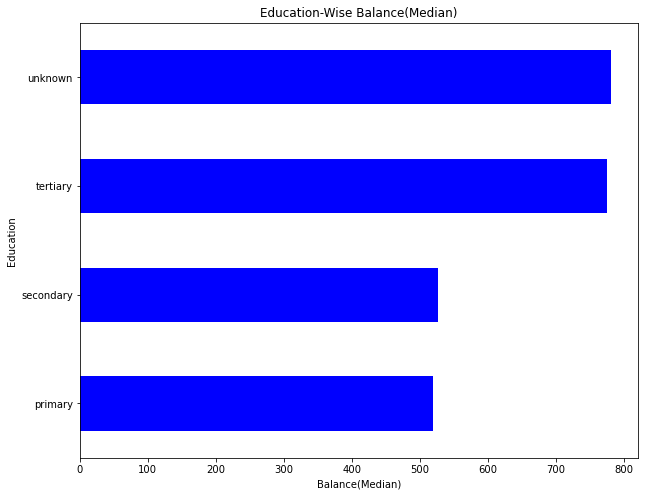

In [11]:
plt.figure(figsize=(10,8))
plt.style.use('default')
BAL.plot.barh(color='b')
plt.title('Education-Wise Balance(Median)')
plt.ylabel('Education')
plt.xlabel('Balance(Median)');

### Tertiary group has highest median
## Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

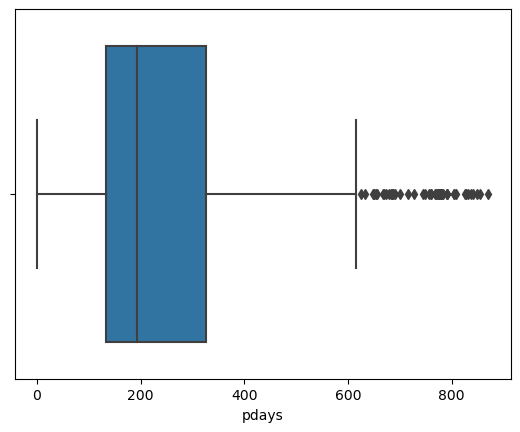

In [12]:
sns.boxplot(data=df1,x='pdays')

### Yes, there are outliers
## The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”
## First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion
## Convert the response variable to a convenient form

In [13]:
df1.replace({'response':{'yes':1,'no':0}}, inplace=True)

In [14]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


## Make suitable plots for associations with numerical features and categorical features

In [15]:
num_feature=[]
cat_feature=[]
for i in df.columns:
    if df[i].dtypes=='O':
        cat_feature.append(i)
    else:
        num_feature.append(i)

In [16]:
print('Categorical features=', cat_feature)
print('Numerical features=', num_feature)

Categorical features= ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']
Numerical features= ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


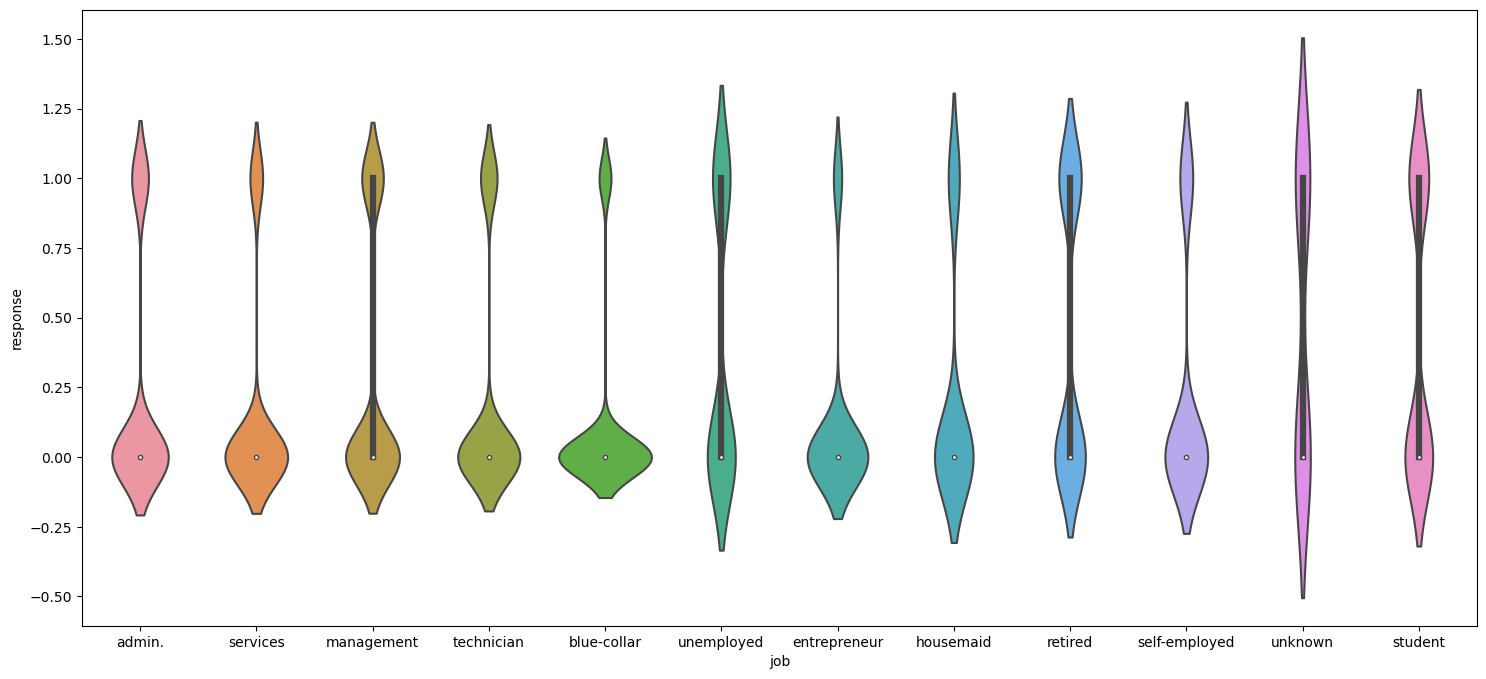

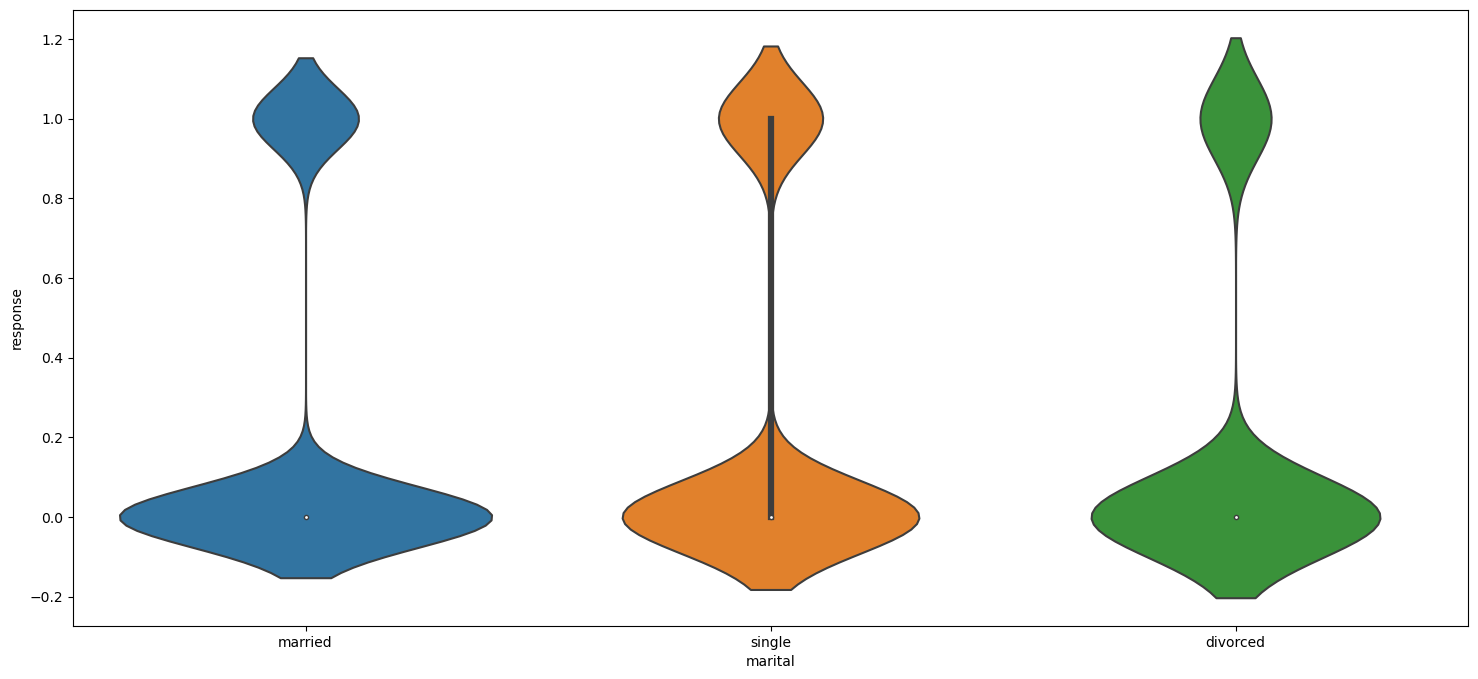

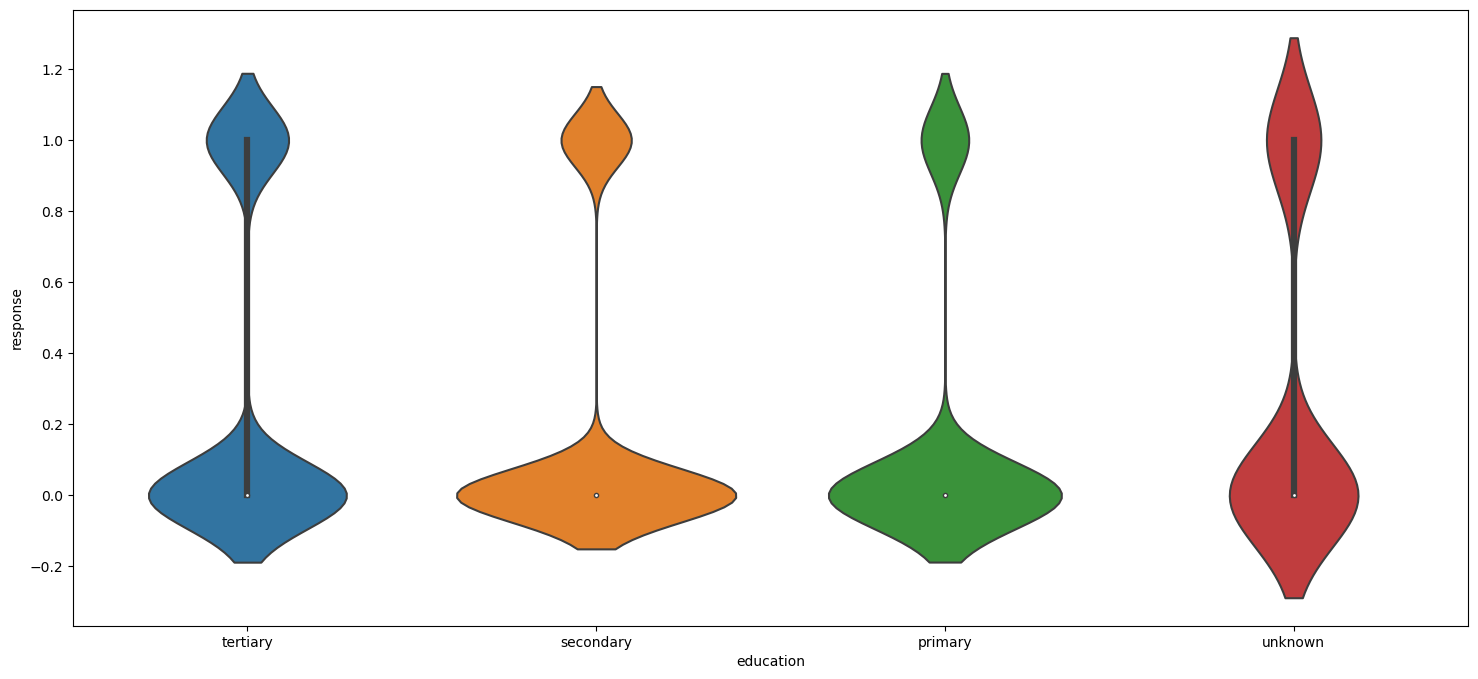

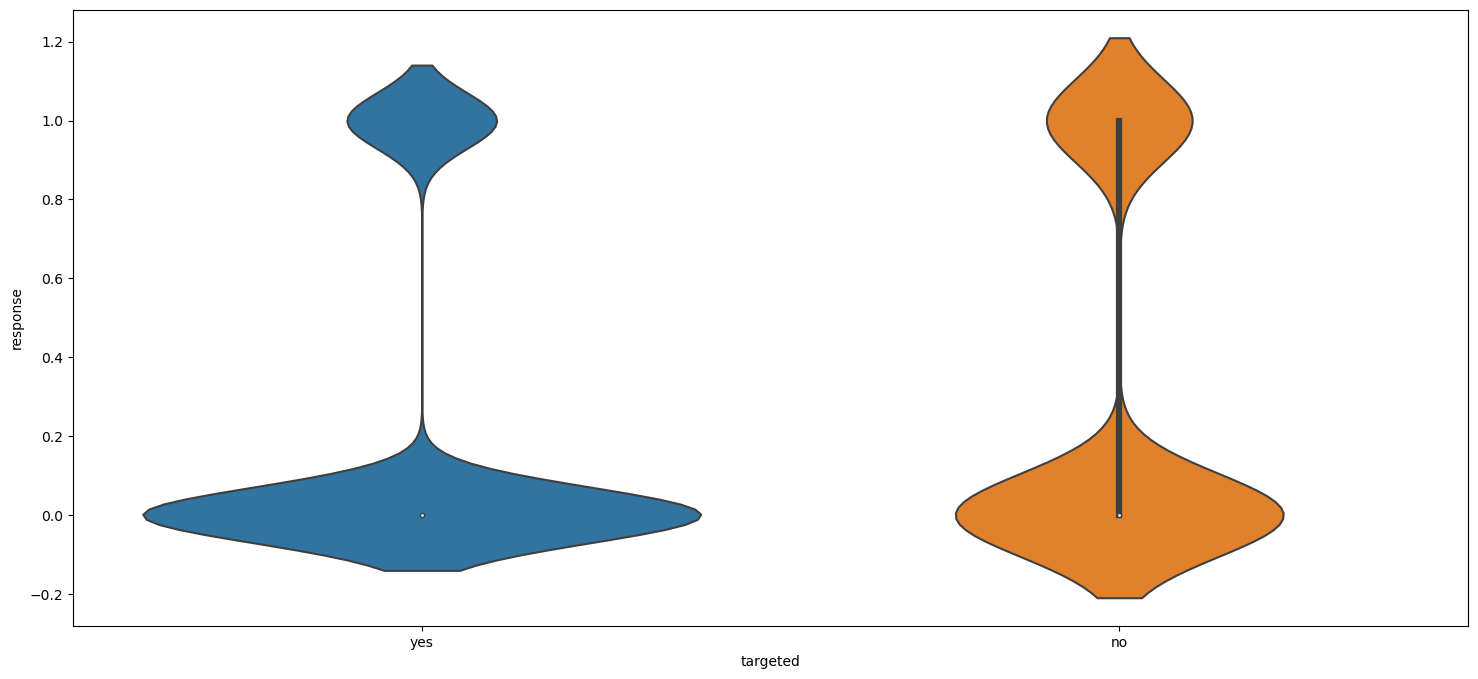

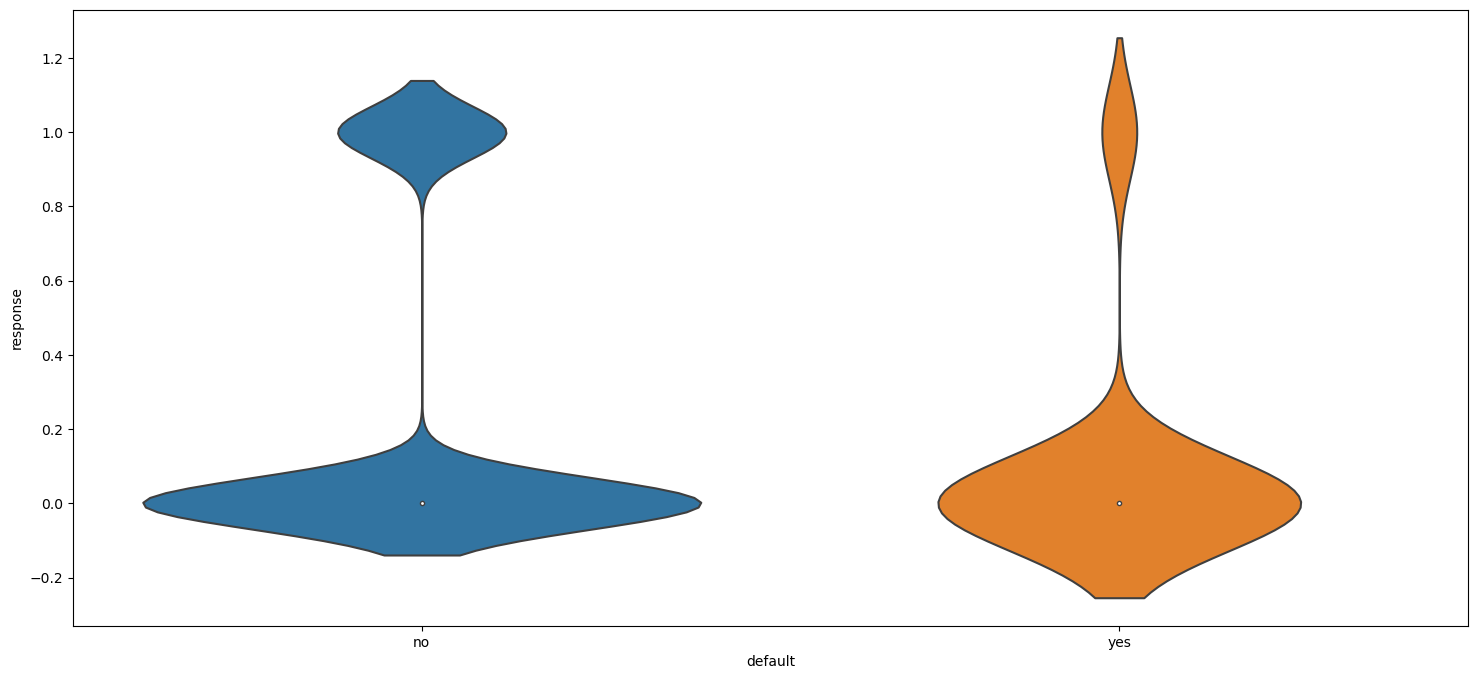

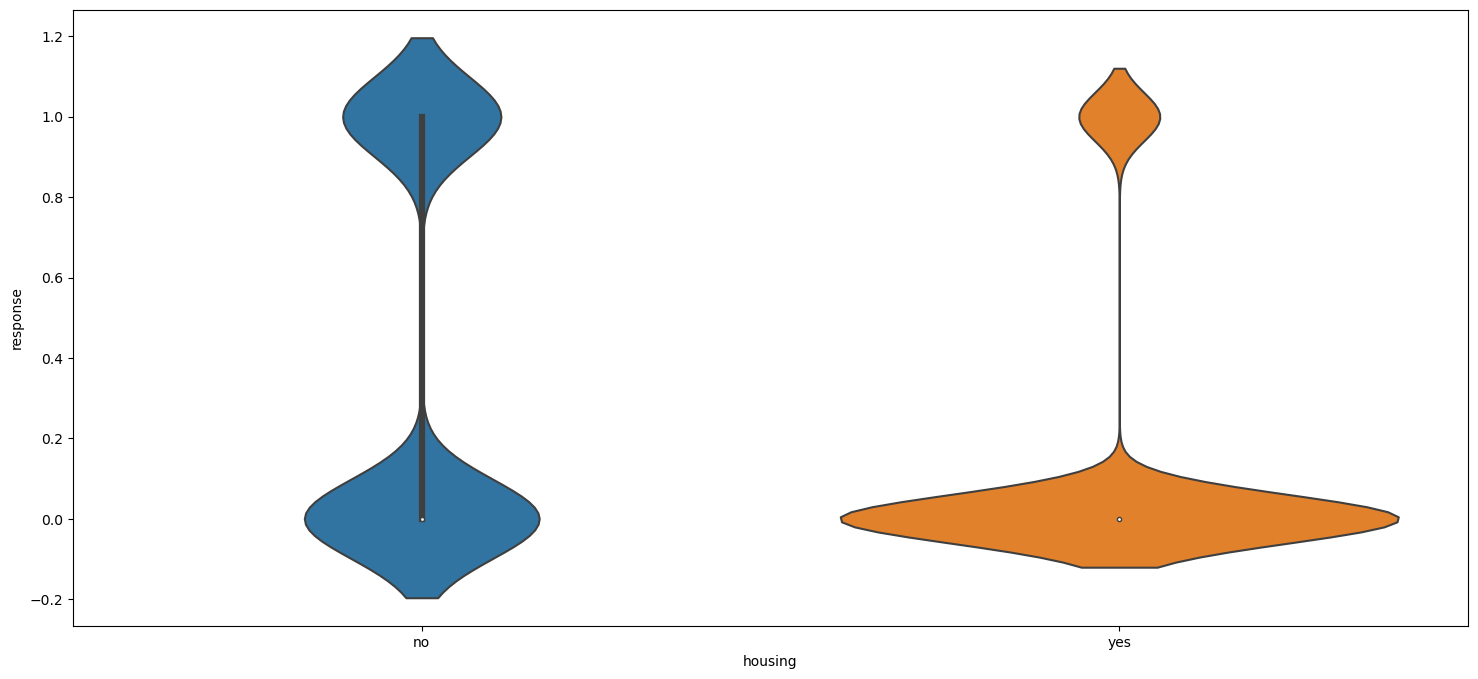

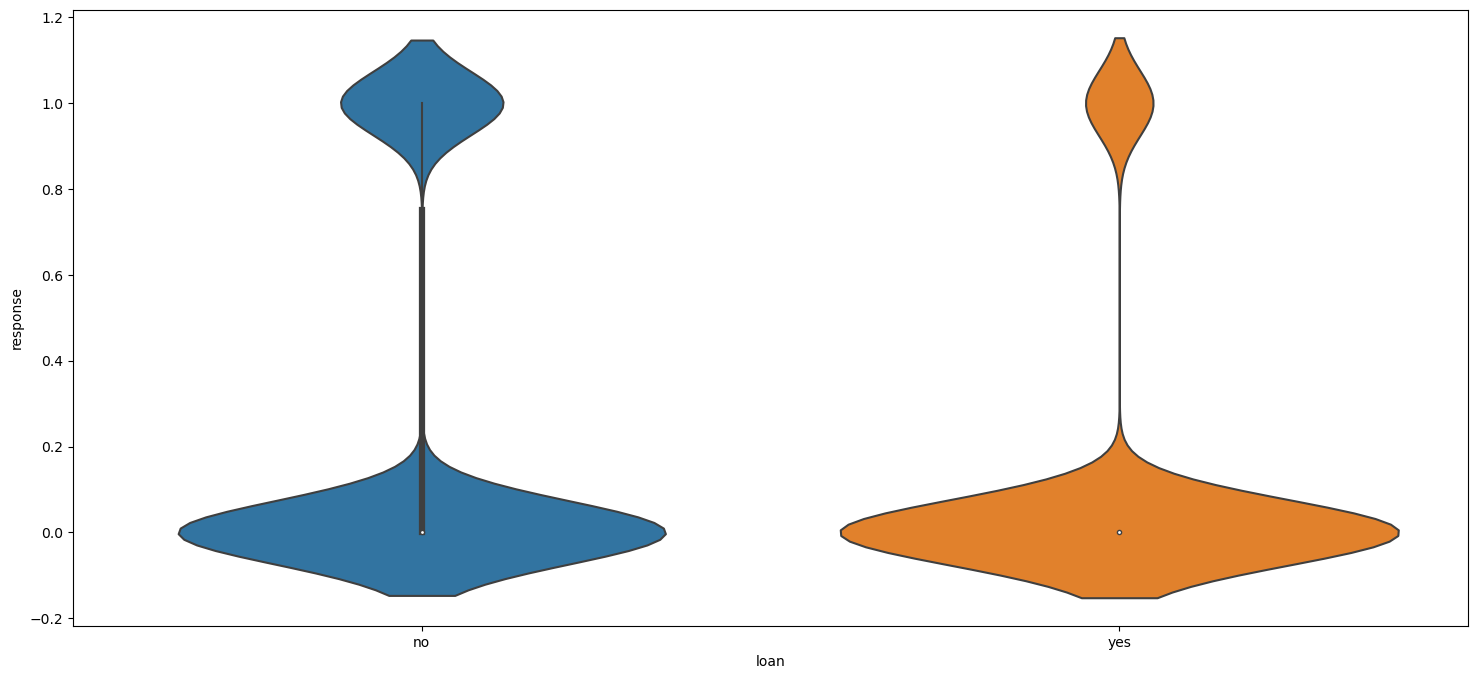

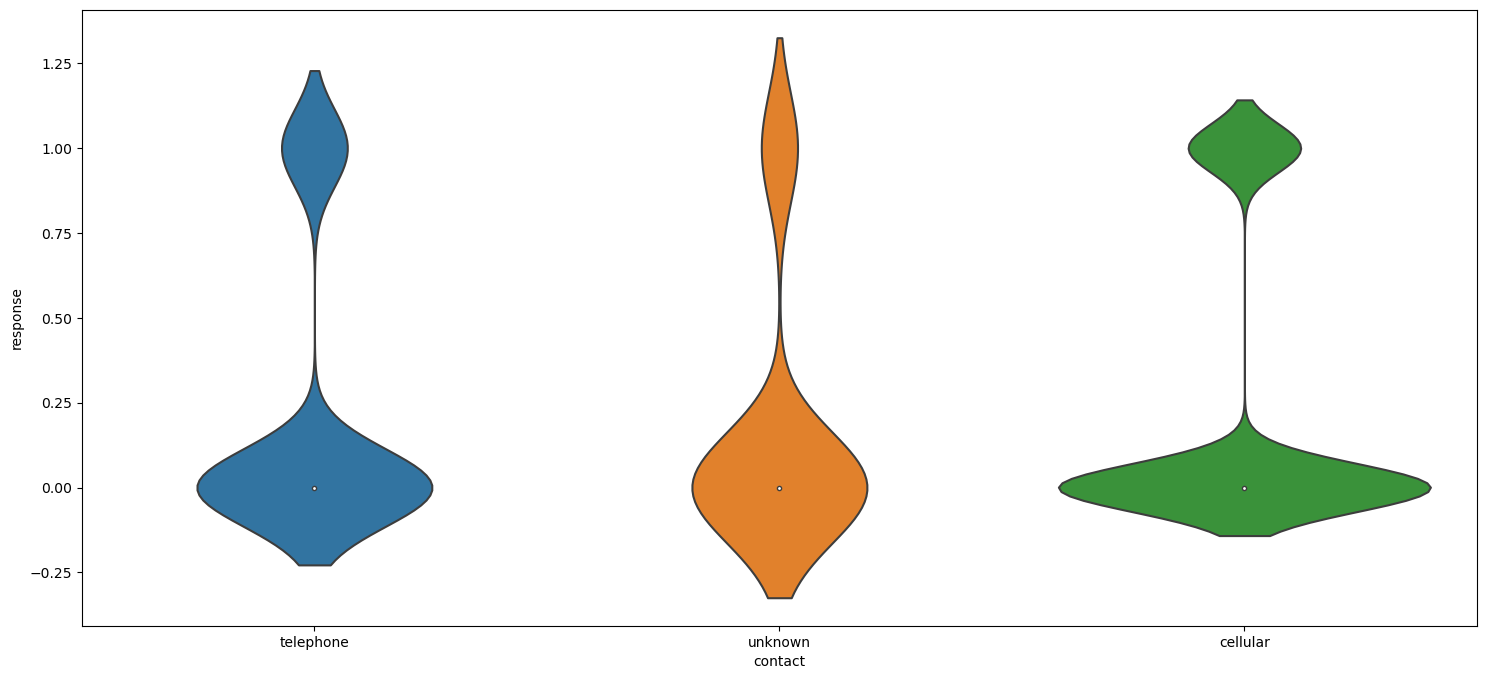

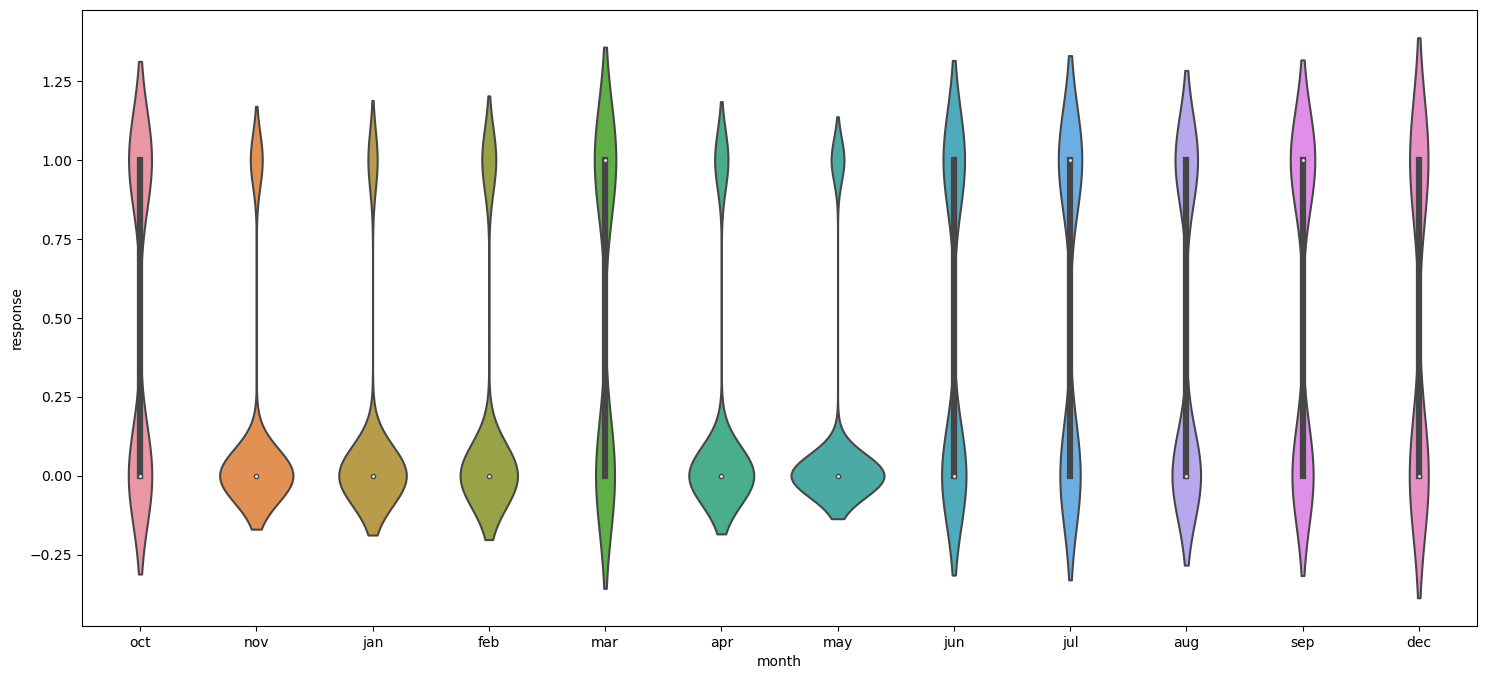

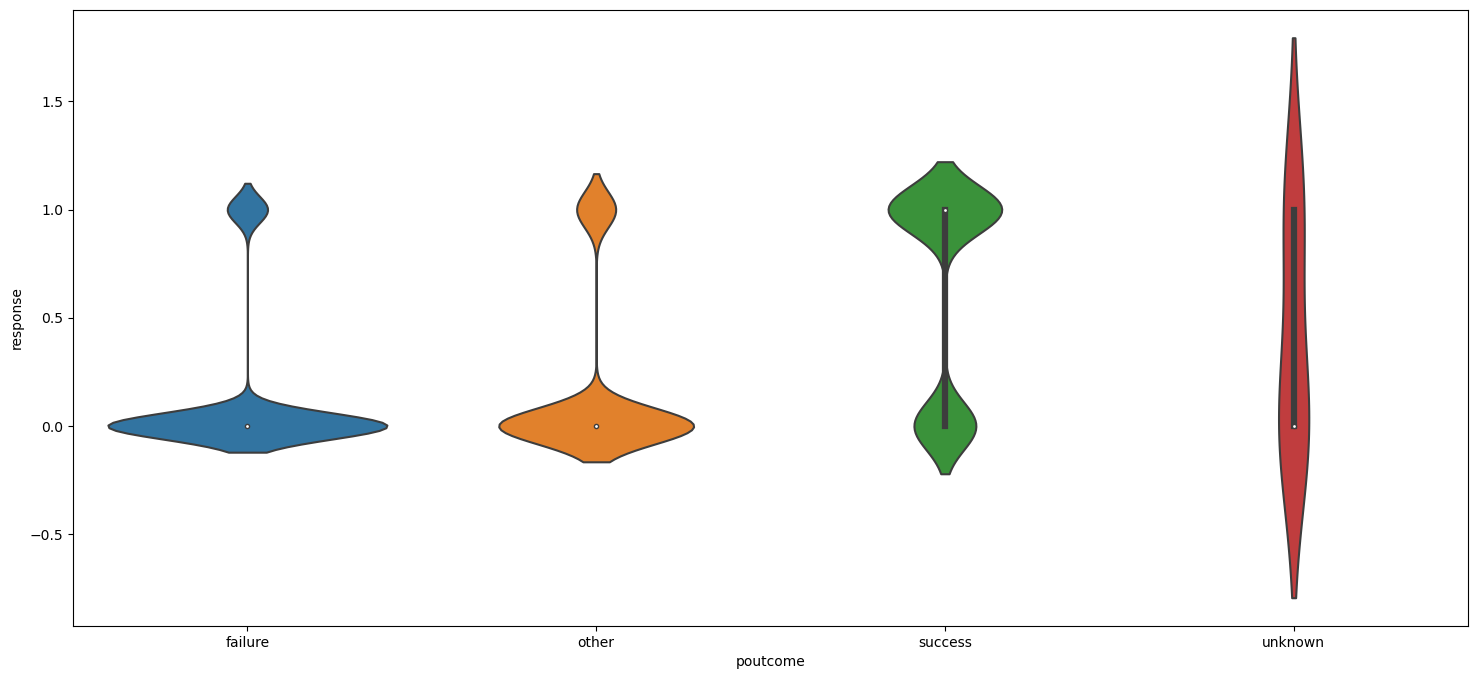

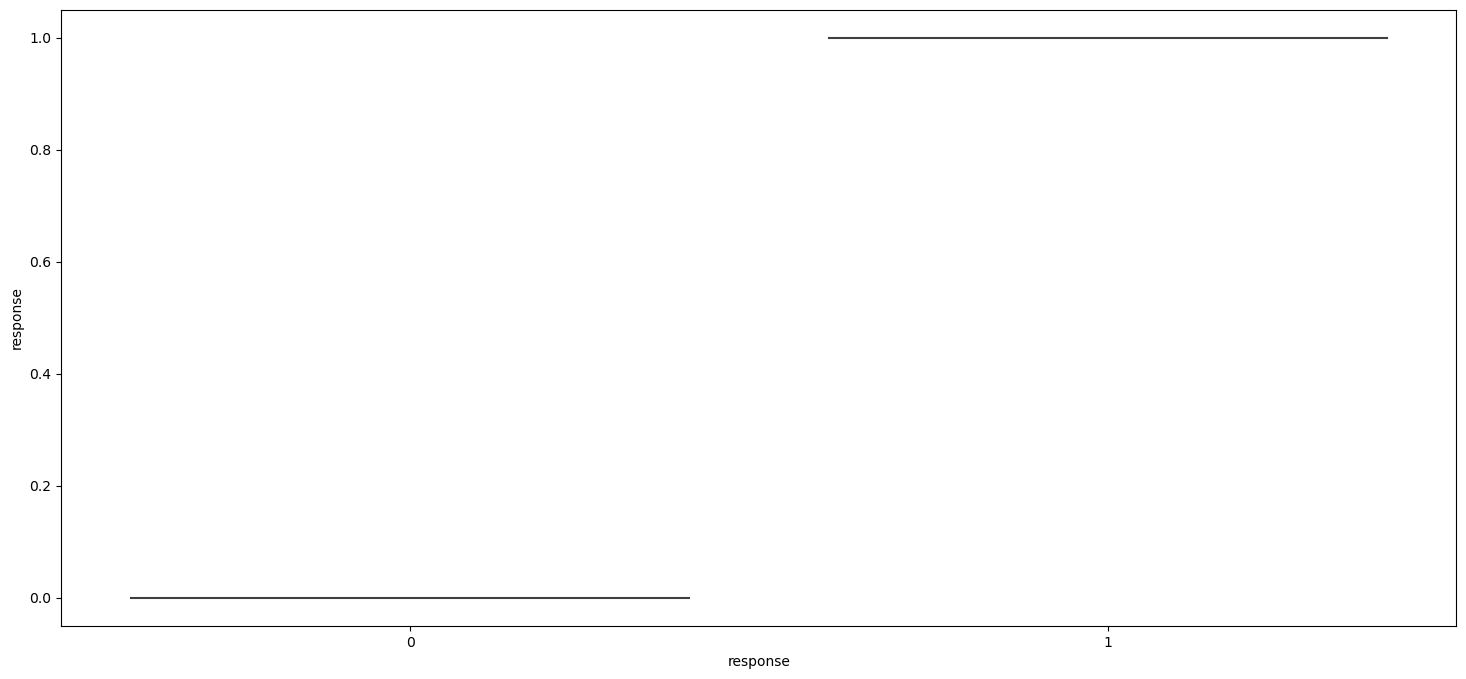

In [17]:
for i in cat_feature:
    plt.figure(figsize=(18,8))
    plt.style.use('default')
    sns.violinplot(df1[i],df1['response']);

In [18]:
# plt.figure(figsize=(10,8))
# plt.title("Correlation between numerical features")
# sns.heatmap(df.corr(),annot=True)

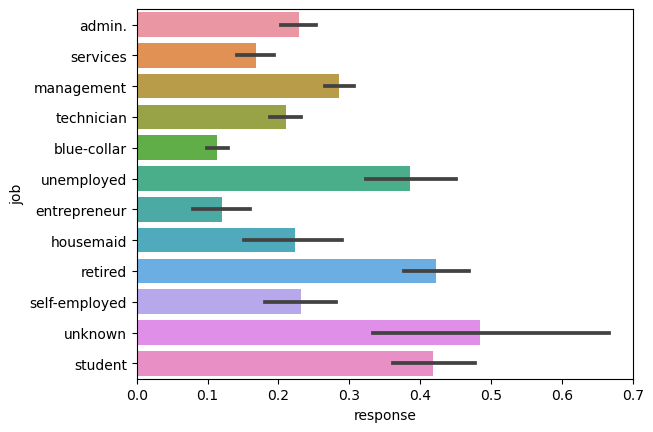

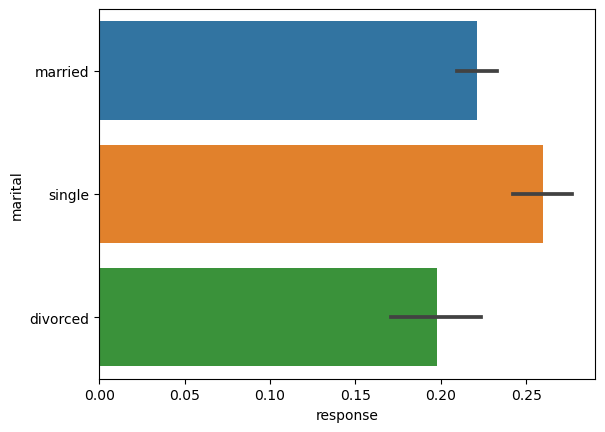

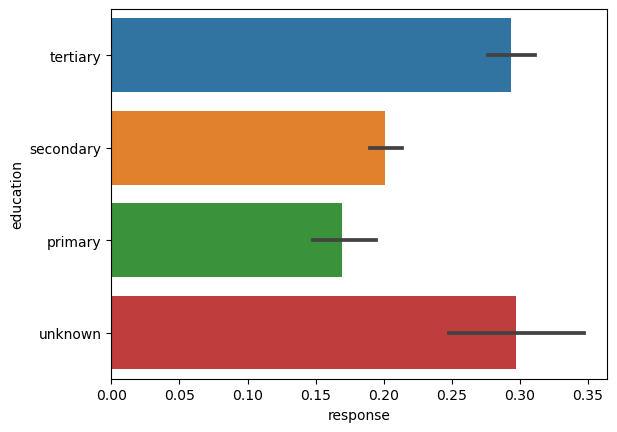

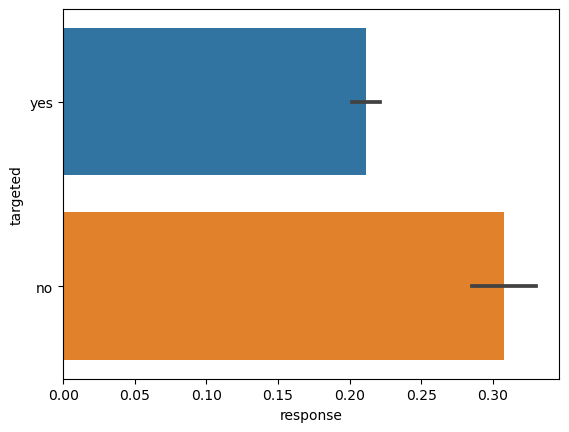

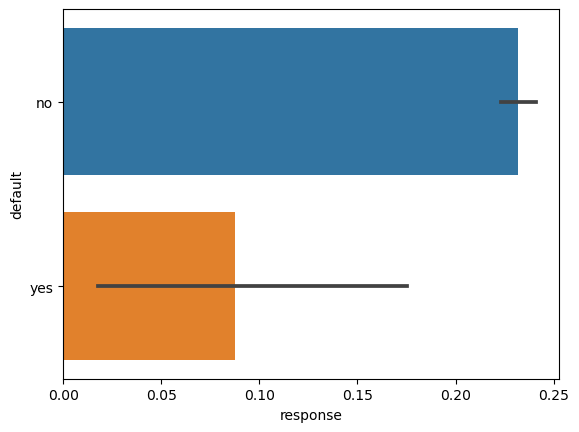

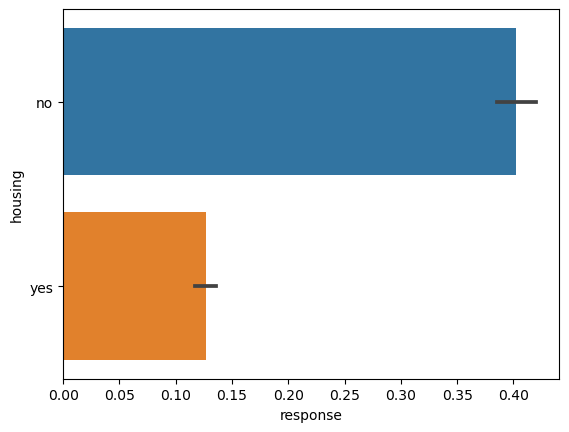

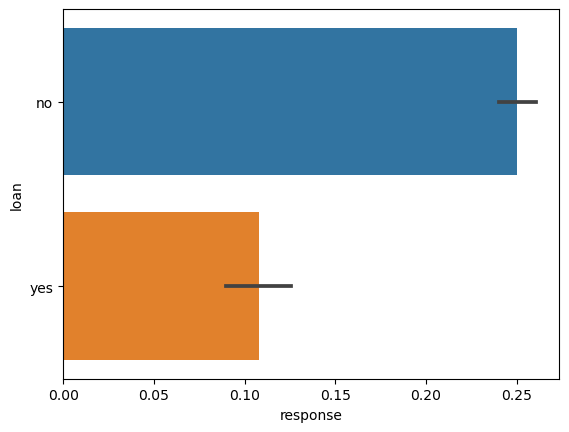

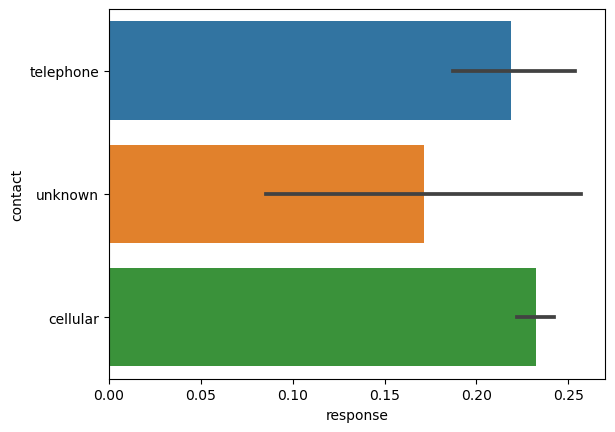

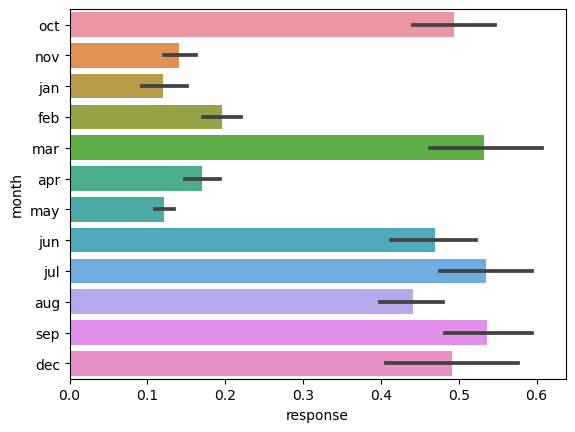

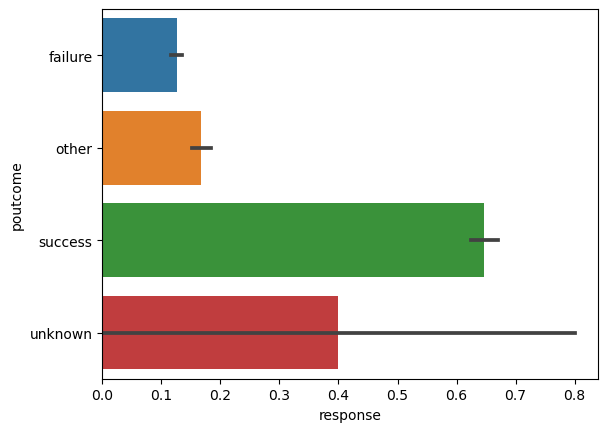

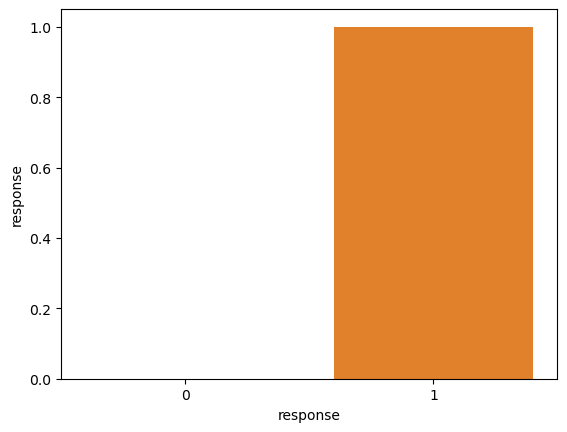

In [19]:
for i in cat_feature:
    sns.barplot(df1['response'],df1[i])
    plt.show()

## Are the features about the previous campaign data useful?
### Yes, previous campaign data is important because based on that we are going to predict whether the customer will respond positively or not
## Are pdays and poutcome associated with the target?
### poutcome is the past data output so we dont think it will affect the target


In [20]:
df1.drop('poutcome',axis=1)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,0
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,1
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,1


### Label encoding of categorical values

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
df2=df1[cat_feature].apply(LabelEncoder().fit_transform)

In [23]:
df2.head()  #ALL CATEGORICAL VALUES ARE ENCODED

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
24060,0,1,2,1,0,0,0,1,10,0,0
24062,0,2,1,1,0,1,1,1,10,1,1
24064,7,1,1,1,0,1,0,1,10,0,1
24072,4,1,2,1,0,1,0,1,10,1,0
24077,4,1,2,1,0,1,0,1,10,0,1


In [24]:
df3=df2.join(df[num_feature])

In [25]:
df3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,1,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,0,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,1,36,100000,0,23,140,1,143,3


## Train Test Split 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [28]:
X = df3.drop('response', axis=1)
Y = df3['response']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

## Model Building (Logistic Regression)

In [30]:
LR = LogisticRegression()

In [33]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [34]:
Y_pred = LR.predict(X_test)

In [35]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1294
           1       0.56      0.20      0.29       358

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.58      1652
weighted avg       0.76      0.79      0.75      1652



In [36]:
confusion_matrix(Y_test,Y_pred)

array([[1240,   54],
       [ 288,   70]], dtype=int64)

In [37]:
f1_score(Y_test,Y_pred)

0.29045643153526973

## RFE

In [38]:
from sklearn.feature_selection import RFE

In [39]:
rfe=RFE(LR,5)
rfe.fit(X_train, Y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [41]:
rfe.support_

array([False, False, False,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [42]:
X_train.columns[rfe.support_]  #THESE WERE THE ATTRIBUTES WHICH WERE SELECTED

Index(['targeted', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [43]:
col=X_train.columns[rfe.support_]

In [44]:
LR.fit(X_train[col], Y_train)

LogisticRegression()

In [45]:
Y_pred2=LR.predict(X_test[col])

In [48]:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1294
           1       0.73      0.39      0.51       358

    accuracy                           0.84      1652
   macro avg       0.79      0.68      0.71      1652
weighted avg       0.83      0.84      0.82      1652



In [49]:
confusion_matrix(Y_test, Y_pred2)

array([[1243,   51],
       [ 218,  140]], dtype=int64)

In [50]:
f1_score(Y_test, Y_pred2)

0.5100182149362477

## VIF to get rid of redundant values

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.915654
3,targeted,6.539455
2,education,6.533275
11,salary,5.401943
16,pdays,5.241166
1,marital,4.318085
13,day,4.098138
8,month,3.622587
5,housing,3.111419
0,job,2.868584


##  Estimate the model performance using k fold cross validation 

In [55]:
import statsmodels.api as sm

In [53]:
F_col = ['education', 'job', 'poutcome', 'marital', 'month','targeted', 'housing', 'salary','day','duration','age']

In [56]:
log = sm.GLM(Y_train,(sm.add_constant(X_train[F_col])), family = sm.families.Binomial())

In [57]:
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6593
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.9
Date:                Thu, 17 Jun 2021   Deviance:                       5161.7
Time:                        14:30:53   Pearson chi2:                 6.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0476      0.296    -10.285      0.000      -3.628      -2.467
education      0.1900      0.068      2.799      0.005       0.057       0.323
job            0.0141      0.011      1.262      0.207      -0.008       0.036
poutcome       1.0559      0.042     24.927      0.000       0.973       1.139
marital        0.1397      0.067      2.082      0.037       0.008       0.271
month          0.0084      0.010      0.834      0.404      -0.011       0.028
targeted      -0.0576      0.113     -0.509      0.611      -0.279       0.164
housing       -1.1663      0.075    -15.588      0.000      -1.313      -1.020
salary      4.435e-07   1.21e-06      0.366      0.714   -1.93e-06    2.82e-06
day            0.0024      0.004      0.557      0.577      -0.006       0.011
duration       0.0035      0.000     22.417      0.000       0.003       0.004
age            0.0021      0.003      0.645      0.519      -0.004       0.009
==============================================================================
"""

In [58]:
LR.fit(X_train[F_col],Y_train)

LogisticRegression()

In [59]:
LR.coef_

array([[ 6.17228507e-03,  1.06119830e-02,  1.67185825e-01,
        -3.98402114e-02, -1.39203181e-01, -4.39631583e-02,
        -1.13788817e-01, -2.81911196e-06, -6.87190018e-03,
         2.76135127e-03, -2.11721408e-02]])

In [60]:
predf = LR.predict(X_test[F_col])

In [61]:
def LR_matric():    
    print('Report:\n',classification_report(Y_test,predf ))
    print("F1 Score:",f1_score(predf,Y_test))
    print('confusion Matrix:\n',confusion_matrix(predf,Y_test))
    print('kfold cross validation:\n',cross_val_score(LR, X, Y, cv=5))

In [62]:
LR_matric()

Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      1294
           1       0.55      0.20      0.30       358

    accuracy                           0.79      1652
   macro avg       0.68      0.58      0.59      1652
weighted avg       0.76      0.79      0.75      1652

F1 Score: 0.2973523421588595
confusion Matrix:
 [[1234  285]
 [  60   73]]
kfold cross validation:
 [0.79539952 0.72397094 0.77892187 0.7752877  0.75529982]


## Predictive model 2: Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
RFC = RandomForestClassifier(max_depth=5,random_state=0,max_leaf_nodes=50)

In [65]:
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=0)

In [66]:
cv1_score= cross_val_score(RFC,X_train,Y_train, cv=5)
np.mean(cv1_score)

0.838001514004542

In [67]:
y_pred= RFC.predict(X_test)

In [68]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### What is the precision, recall, accuracy of your model?


In [69]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1294
           1       0.79      0.42      0.54       358

    accuracy                           0.85      1652
   macro avg       0.82      0.69      0.73      1652
weighted avg       0.84      0.85      0.83      1652



In [70]:
f1_score(Y_test,y_pred)

0.5447897623400365

In [71]:
confusion_matrix(Y_test,y_pred)

array([[1254,   40],
       [ 209,  149]], dtype=int64)

In [72]:
from sklearn.metrics import roc_auc_score

In [73]:
roc_auc_score(Y_test,y_pred)

0.6926446081182596

### Using the feature importance values from the Random Forest module, identify the most important features for the model


In [74]:
rfe1 = RFE(RFC, 5)
rfe1.fit(X_train,Y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=0),
    n_features_to_select=5)

In [75]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [76]:
X_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [77]:
cols = X_train.columns[rfe1.support_]

In [78]:
RFC.fit(X_train[cols],Y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=0)

In [79]:
y_pred3 = RFC.predict(X_test[cols])

In [80]:
f1_score(y_pred3,Y_test)

0.5993265993265994

In [81]:
confusion_matrix(y_pred3,Y_test)

array([[1236,  180],
       [  58,  178]], dtype=int64)

In [82]:
print(classification_report(y_pred3, Y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1416
           1       0.50      0.75      0.60       236

    accuracy                           0.86      1652
   macro avg       0.73      0.81      0.76      1652
weighted avg       0.89      0.86      0.87      1652



In [83]:
roc_auc_score(Y_test,y_pred3)

0.7261922236709177

### After evaluating both the tests Random forest model has better performance as it's accuracy is better than Logistic regression.
### I chose roc_auc_score metric because this works good with classification problems.
### Important features are not similar.